# AbstractGEN: Data Analysis 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
import nltk
nltk.download('punkt')

import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# TXT to CSV(dataframe)

In [0]:
FILEEXIST = True

if FILEEXIST : 
  with open('/content/titles_and_abstracts.txt','r') as f:
    data = f.read()

  data = [i for i in data.split('\n') if i != '']
  data_dict = {'TITLE' : [], 'ABSTRACT' : []}
  for i in range(0, len(data), 2):
    data_dict['TITLE'].append(data[i])
    data_dict['ABSTRACT'].append(data[i+1])
  df = pd.DataFrame(data_dict)
  df.to_csv('abstract.csv')
else:
  df = pd.read_csv('/content/abstract.csv')

# Data Analysis

In [0]:
df.head()

,TITLE,ABSTRACT
0,evaluation technology from speaker identificat...,we propose a multi-step system for the analysi...
1,acquisition of semantic classes for adjectives...,"in this paper , we present a clustering experi..."
2,features for detecting hedge cues,we present a sequential labeling approach to h...
3,semantic extraction with wide-coverage lexical...,we report on results of combining graphical mo...
4,evaluating a crosslinguistic grammar resource ...,this paper evaluates the lingo grammar matrix ...


## 문장 길이 분석

### TITLE 길이

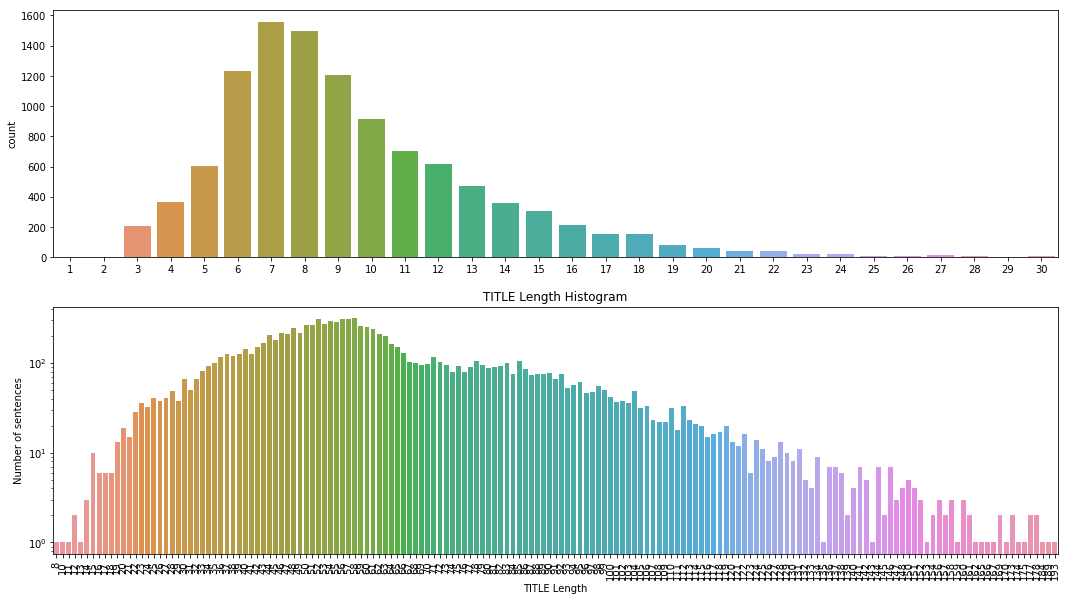

CPU times: user 3.51 s, sys: 459 ms, total: 3.97 s
Wall time: 3.53 s


In [0]:
%%time
# Title 길이
T_tokenized_sentences = pd.Series([s.split() for s in df['TITLE']])
T_sent_len_by_word = T_tokenized_sentences.apply(lambda x : len(x))
T_sent_len_by_char = df['TITLE'].apply(lambda x : len(x.replace(' ', '')))

fig, ax = plt.subplots(2, 1, figsize=(18,10))
#plt.hist(T_sent_len_by_word, bins=50, range=[0,50], alpha=0.6, color='r', label ='word')
#plt.hist(T_sent_len_by_char, bins=50, range=[0,50], alpha=0.6, color='g', label ='char' )
sns.countplot(T_sent_len_by_word, ax=ax[0])
sns.countplot(T_sent_len_by_char, ax=ax[1])

plt.yscale('log') # y값의 스케일을 조정함으로써 차이가 큰 데이터를 비교가능하게 함
plt.title('TITLE Length Histogram')
plt.xlabel('TITLE Length')
plt.setp(ax[1].get_xticklabels(), rotation=90)
plt.ylabel('Number of sentences')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


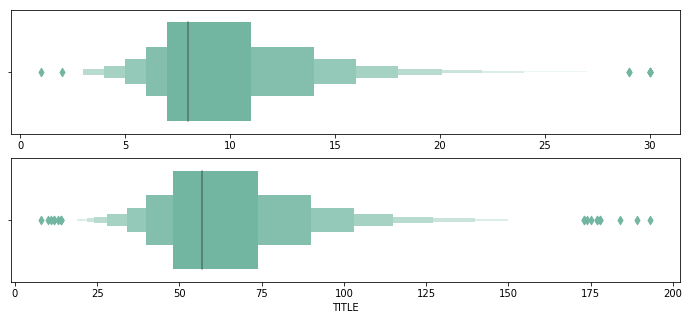

In [0]:
fig, ax = plt.subplots(2, 1, figsize=(12,5))
sns.boxenplot(T_sent_len_by_word, ax=ax[0])
sns.boxenplot(T_sent_len_by_char, ax=ax[1])
plt.show()

In [0]:
print("WORD 단위")

print('제목의 최대 길이: {}'.format(np.max(T_sent_len_by_word)))
print('제목의 최소 길이: {}'.format(np.min(T_sent_len_by_word)))
print('제목의 평균 길이: {}'.format(np.mean(T_sent_len_by_word)))
print('제목의 표준편차: {:.2f}'.format(np.std(T_sent_len_by_word)))
print('제목의 제3사분위: {}'.format(np.percentile(T_sent_len_by_word, 75)))
print()


print("="*40)
print()
print("CHAR 단위")
print('제목의 최대 길이(char): {}'.format(np.max(T_sent_len_by_char)))
print('제목의 최소 길이: {}'.format(np.min(T_sent_len_by_char)))
print('제목의 평균 길이: {}'.format(np.mean(T_sent_len_by_char)))
print('제목의 표준편차: {:.2f}'.format(np.std(T_sent_len_by_char)))
#print('제목의 제3사분위: {}'.format(np.percentile(T_sent_len_by_char, 75))

WORD 단위
제목의 최대 길이: 30
제목의 최소 길이: 1
제목의 평균 길이: 9.362850574712644
제목의 표준편차: 3.89
제목의 제3사분위: 11.0


CHAR 단위
제목의 최대 길이(char): 193
제목의 최소 길이: 8
제목의 평균 길이: 62.37379310344828
제목의 표준편차: 23.18


In [0]:
T_sent_len_by_char.describe(include='all')

count    10875.000000
mean        62.373793
std         23.176696
min          8.000000
25%         48.000000
50%         57.000000
75%         74.000000
max        193.000000
Name: TITLE, dtype: float64

### Abstract 길이

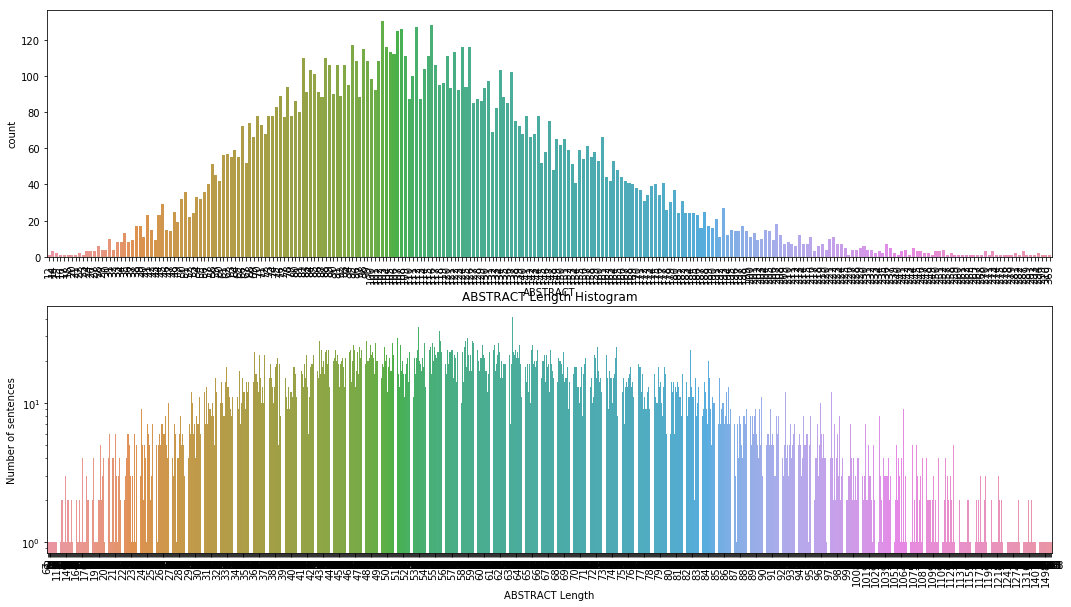

CPU times: user 20.8 s, sys: 997 ms, total: 21.8 s
Wall time: 21.3 s


In [0]:
%%time
from itertools import chain 
# ABSTRACT 길이
sent_len_by_word = df['ABSTRACT'].apply(lambda x : len(x.split()))
sent_len_by_char = df['ABSTRACT'].apply(lambda x : len(x.replace(' ', '')))

fig, ax = plt.subplots(2, 1, figsize=(18,10))
#plt.hist(T_sent_len_by_word, bins=50, range=[0,50], alpha=0.6, color='r', label ='word')
#plt.hist(T_sent_len_by_char, bins=50, range=[0,50], alpha=0.6, color='g', label ='char' )
sns.countplot(sent_len_by_word, ax=ax[0])
sns.countplot(sent_len_by_char, ax=ax[1])

plt.yscale('log') # y값의 스케일을 조정함으로써 차이가 큰 데이터를 비교가능하게 함
plt.title('ABSTRACT Length Histogram')
plt.xlabel('ABSTRACT Length')
plt.setp(ax[0].get_xticklabels(), rotation=90)
plt.setp(ax[1].get_xticklabels()[::10], rotation=90)
plt.ylabel('Number of sentences')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


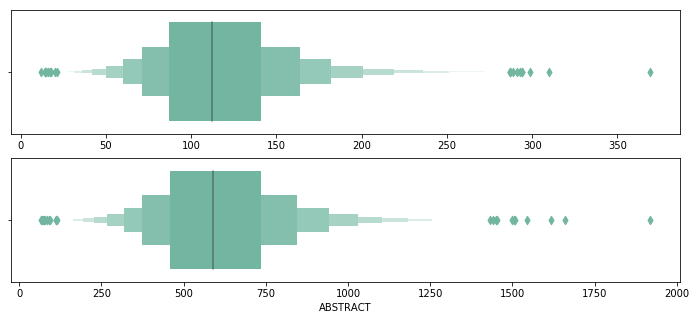

In [0]:
fig, ax = plt.subplots(2, 1, figsize=(12,5))
sns.boxenplot(sent_len_by_word, ax=ax[0])
sns.boxenplot(sent_len_by_char, ax=ax[1])
plt.show()

In [0]:
print('초록의 최대 길이(word): {}'.format(np.max(sent_len_by_word)))
print('초록의 최소 길이: {}'.format(np.min(sent_len_by_word)))
print('초록의 평균 길이: {}'.format(np.mean(sent_len_by_word)))
print('초록의 표준편차: {:.2f}'.format(np.std(sent_len_by_word)))
print('초록의 제3사분위: {}'.format(np.percentile(sent_len_by_word, 75)))

print("="*40)
print('초록의 최대 길이(char): {}'.format(np.max(sent_len_by_char)))
print('초록의 최소 길이: {}'.format(np.min(sent_len_by_char)))
print('초록의 평균 길이: {}'.format(np.mean(sent_len_by_char)))
print('초록의 표준편차: {:.2f}'.format(np.std(sent_len_by_char)))

초록의 최대 길이(word): 369
초록의 최소 길이: 12
초록의 평균 길이: 116.0655632183908
초록의 표준편차: 40.94
초록의 제3사분위: 141.0
초록의 최대 길이(char): 4573
초록의 최소 길이: 159
초록의 평균 길이: 1443.4969195402298
초록의 표준편차: 492.95


이제 이 길이값을 통해 모델에 적용할 ***문장의 최대길이***를 결정해야 한다.

 위에 나온 문장 길이에 대한 통계를 보고 중간값이나 제3사분위의 값을 적용할 수도 있다. 
 하지만 실제로 통계를 번영한 길이를 그래도 넣었을 때, 만족할만한 성능을 얻기는 쉽지 않다. 디코더의 경우 문장 뒷부분이 일부 잘려서, 생성하려는 문장이 완전하지 않은 결과를 낳았다. 

 모델 학습을 여러 번 시도하여 경험적으로 가장 좋은 성능이 나오는 최대 문장 길이를 설정해야한다. 

 지금은 우선 ***최대 문장길이를 제3사분위 값***으로 설정한다. 

## 데이터 어휘 빈도 분석

언어학 논문들에서 어떤 단어가 사용되는지, 자주 사용되는 단어는 어떤 것들이 있는지 알아보자. 

단순히 tokenizing한 데이터에서 자주 사용되는 단어를 분석하면 Stopwords들이 가장 큰 빈도를 차지할 것이다. 

따라서, stopwords를 제외하고, 의미적으로 단어들로 구성된 문자열을 만들고, 이를 **워드 클라우드**로 표현하고자 한다. 

In [0]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

print(pos_tag('he', 'violate'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('h', 'NN'), ('e', 'NN'), (' ', 'NNP'), ('v', 'NN'), ('i', 'NN'), ('o', 'VBP'), ('l', 'NN'), ('a', 'DT'), ('t', 'NN'), ('e', 'NN')]


In [0]:
postaglist = ['JJ', 'JJR','JJS','NN','NNS','NNPS']

In [0]:
%%time
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
tokenized_sentences = pd.DataFrame(chain(*[s.split() for s in df['ABSTRACT']]))
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
CPU times: user 244 ms, sys: 3.85 ms, total: 248 ms
Wall time: 252 ms


In [0]:
tokenized_sentences['postag'] = tokenized_sentences[0].apply(lambda x : pos_tag([x])[0][1] )

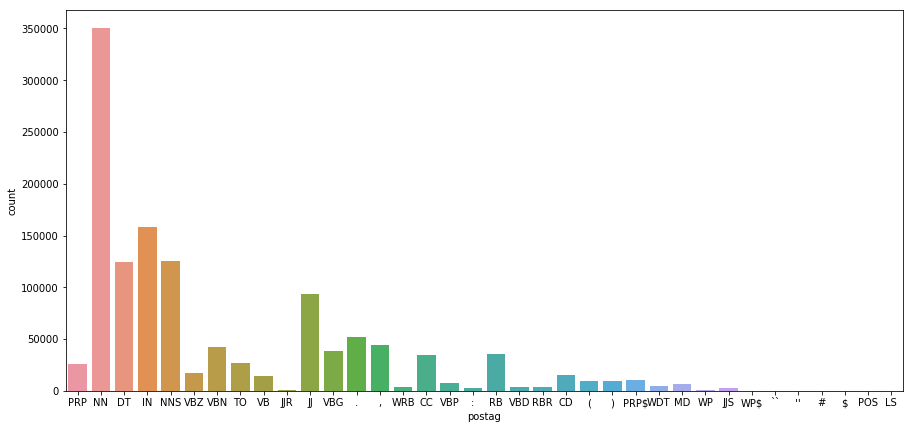

In [0]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
sns.countplot(tokenized_sentences['postag'], ax=ax)

In [0]:
tokenized_sentences.head()

,0,postag
0,we,PRP
1,propose,NN
2,a,DT
3,multi-step,NN
4,system,NN


In [0]:
%%time 

txt_important = [str(i[0]) for i in tokenized_sentences.values if i[1] in postaglist]
print(txt_important[:10])

['propose', 'multi-step', 'system', 'analysis', 'childrens', 'stories', 'part', 'larger', 'text-to-speechbased', 'system']
CPU times: user 587 ms, sys: 4.9 ms, total: 592 ms
Wall time: 595 ms


In [0]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show>

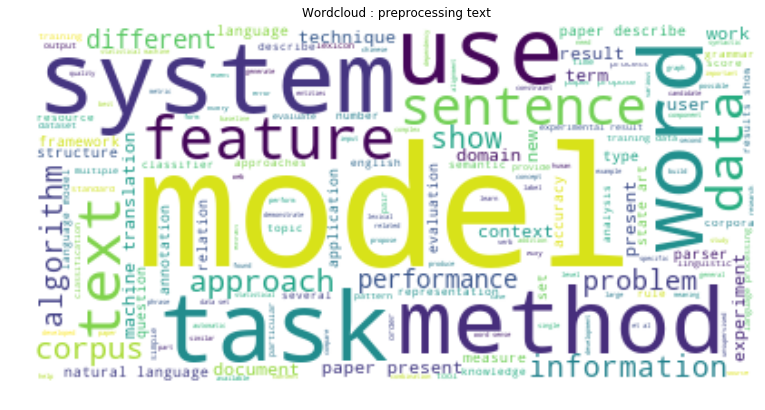

In [0]:
fig, ax = plt.subplots(1,1, figsize = (13, 9))
cloud = WordCloud(background_color='white').generate(' '.join(txt_important))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud : preprocessing text')
plt.show